In [1]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from Functions import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

#### Function to read data,merge datasets and clean data

In [2]:
MH_data= pd.read_csv('Data/Mental Health Data 2016.csv')
MH_data=MH_data.rename(columns={'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?':'Discussion with Supervisor','How many employees does your company or organization have?':'CompanySize','do you have a family history of mental illness?' : 'Family History of Mental Illness'})
df = clean_gender(MH_data)
df = givescore(df)
df =clean_age(df)

####  The approach I took instead of classifying a person having mental health issue or not is to provide scores to a particular user on the basis of the answers they have given in the survey


### Hypothesis 1:Companies with a smaller number of people have less mental health issue.


CompanySize vs MH Score,0.0,5.0,10.0,15.0,20.0,25.0,30.0
CompanySize,,,,,,,
100-500,0.052288,0.065359,0.058824,0.169935,0.019608,0.444444,0.189542
1000+,0.036496,0.058394,0.051095,0.094891,0.051095,0.379562,0.328467
26-100,0.073034,0.061798,0.050562,0.123596,0.050562,0.376404,0.264045
500-1000,0.089286,0.035714,0.000000,0.160714,0.053571,0.375000,0.285714


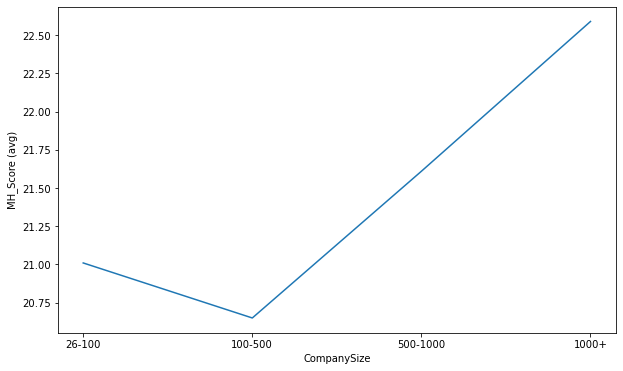

In [3]:
hypo1(df, 'CompanySize')

#### As the number of companies is increasing the Mental Health Score is increasing which means that people in smaller companies have less mental health issues as the Mental Health Score is less. And thus the hypothesis is True.

###  Hypothesis 2:Companies with large number of employees formally discuss mental health issues.

Mental Health discussion with Supervisor,Maybe,No,Yes
CompanySize,,,
100-500,0.348178,0.267206,0.384615
1000+,0.294118,0.380392,0.325490
26-100,0.359589,0.253425,0.386986
500-1000,0.400000,0.212500,0.387500


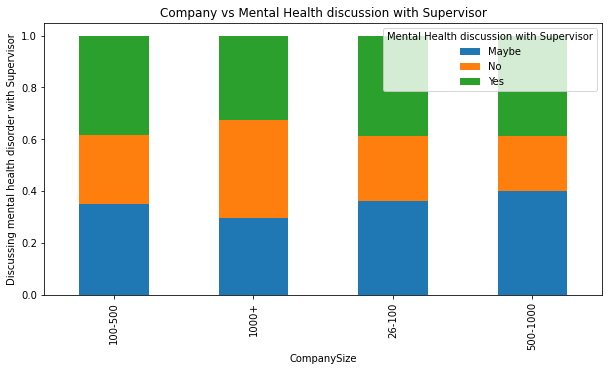

In [4]:
hypo2(df,'CompanySize','Discussion with Supervisor')

#### Through the help of the Staked Bar Chart we can see that Companies with fewer employees  prefer to discuss mental health issues with their supervisors and thus the Hypothesis is true.

### Hypothesis 3:People in the age group 20-30 are most likely to discuss the mental health issues with the supervisor.

Discuss Mental Health with supervisor,Maybe,No,Yes
agerange,,,
18-29,0.348624,0.314985,0.336391
30-39,0.334165,0.259352,0.406484
40-49,0.360656,0.344262,0.295082
50-59,0.263158,0.263158,0.473684
60-75,0.250000,0.000000,0.750000


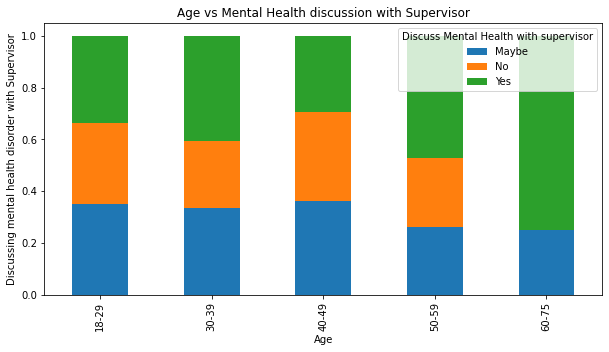

In [5]:
hypo3(df,'Discussion with Supervisor')

#### Through the help of the Staked Bar Chart we can see that Employees in the age group 60-75  prefer to discuss mental health issues with their supervisors and thus they hypothesis is rejected.

### Hypothesis 4:Countries with High health expenditure improved the healthy score in the happiness report over the years.

In [6]:
hypo4_data=mergedata('Data/World Happiness Report.csv','Data/World Health Expenditure.csv')

In [7]:
UK_df=hypo4_data[hypo4_data['Country']=='United Kingdom']
Australia_df = hypo4_data[hypo4_data['Country']=='Australia']
Netherland_df=hypo4_data[hypo4_data['Country']=='Netherlands']
Switzerland_df=hypo4_data[hypo4_data['Country']=='Switzerland']

In [ ]:
y="Year"
x="Expentancy"
color="Country"
size= "Health Expenditure"
hover_name="Country"
log_x=True 
size_max=60
scatter_plot(hypo4_data,x,y,color,size,hover_name,log_x,size_max)

In [ ]:
hypo4b(UK_df,Australia_df,Netherland_df,Switzerland_df)

#### With the help of the the bubble chart we are able to see growth in Health Expentancy as Health Expenditure increases, thus we fail to reject the hypothesis 